Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t a single & multiple feature.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# shape of the the dataset
n,m = df.shape

print("Dataset has {} rows and {} columns".format(n,m))

Dataset has 545 rows and 13 columns


In [5]:
# no of missing values in each column
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
# to check for duplicate values
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Housing Data Set has 545 rows and 13 columns. There are no missing values and there are no duplicate rows or tuples. In the dataset we have 6 Numerical Features and 7 Categorical data

In [8]:
# Lets find the number of unique features
# Find the number of unique features
unique_counts = df.nunique()

# Print the unique counts for each feature
for feature, count in unique_counts.items():
    print(f"{feature}: {count}")

price: 219
area: 284
bedrooms: 6
bathrooms: 4
stories: 4
mainroad: 2
guestroom: 2
basement: 2
hotwaterheating: 2
airconditioning: 2
parking: 4
prefarea: 2
furnishingstatus: 3


In [11]:
# range of numerical features
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.00,4766729.25,1870439.62,1750000.00,3430000.00,4340000.00,5740000.00,13300000.00
area,545.00,5150.54,2170.14,1650.00,3600.00,4600.00,6360.00,16200.00
bedrooms,545.00,2.97,0.74,1.00,2.00,3.00,3.00,6.00
bathrooms,545.00,1.29,0.50,1.00,1.00,1.00,2.00,4.00
stories,545.00,1.81,0.87,1.00,1.00,2.00,2.00,4.00
parking,545.00,0.69,0.86,0.00,0.00,0.00,1.00,3.00


In [14]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.95]).T

,count,mean,std,min,10%,25%,50%,75%,80%,90%,95%,max
price,545.00,4766729.25,1870439.62,1750000.00,2835000.00,3430000.00,4340000.00,5740000.00,6093500.00,7350000.00,8400000.00,13300000.00
area,545.00,5150.54,2170.14,1650.00,3000.00,3600.00,4600.00,6360.00,6600.00,7980.00,9000.00,16200.00
bedrooms,545.00,2.97,0.74,1.00,2.00,2.00,3.00,3.00,3.00,4.00,4.00,6.00
bathrooms,545.00,1.29,0.50,1.00,1.00,1.00,1.00,2.00,2.00,2.00,2.00,4.00
stories,545.00,1.81,0.87,1.00,1.00,1.00,2.00,2.00,2.00,3.00,4.00,4.00
parking,545.00,0.69,0.86,0.00,0.00,0.00,0.00,1.00,2.00,2.00,2.00,3.00


From the above trends following can be observed:
1. More than 50% for the houses have no parking, 95% of houses has 2 parking.Hence no of parking could be a feature leading to outlier in price.
2. 90% of the houses are of 2 stories, only 10% houses have more than 3 stories, hence stories can be not a higlhly correlated and feature leading to outlier house price.
3. No of bathrooms is 2 for 95% of the houses, and from the price difference between 95% and max value no of bathrooms can be correlated and leading to outlier house price.
4. No of bedrooms and area have a stable trend in terms of percentile and could be highly correlated to target variable.

/var/folders/by/vtsd7rps6ws3192ydxn8j6pr0000gn/T/ipykernel_7845/3223485926.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


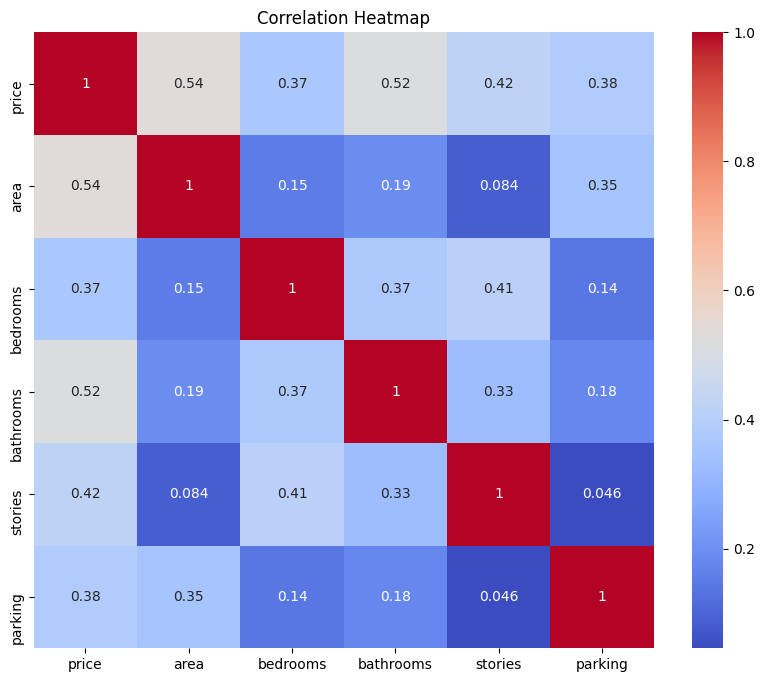

In [8]:
# Create a heatmap to visualize the correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From the heat map above, parking and bedroom have relatively or are relatively lesser correlated to price, where as stories is moderately related and are & no of bathrooms is highly correlated

Text(0.5, 1.0, 'House Pricing Spread')

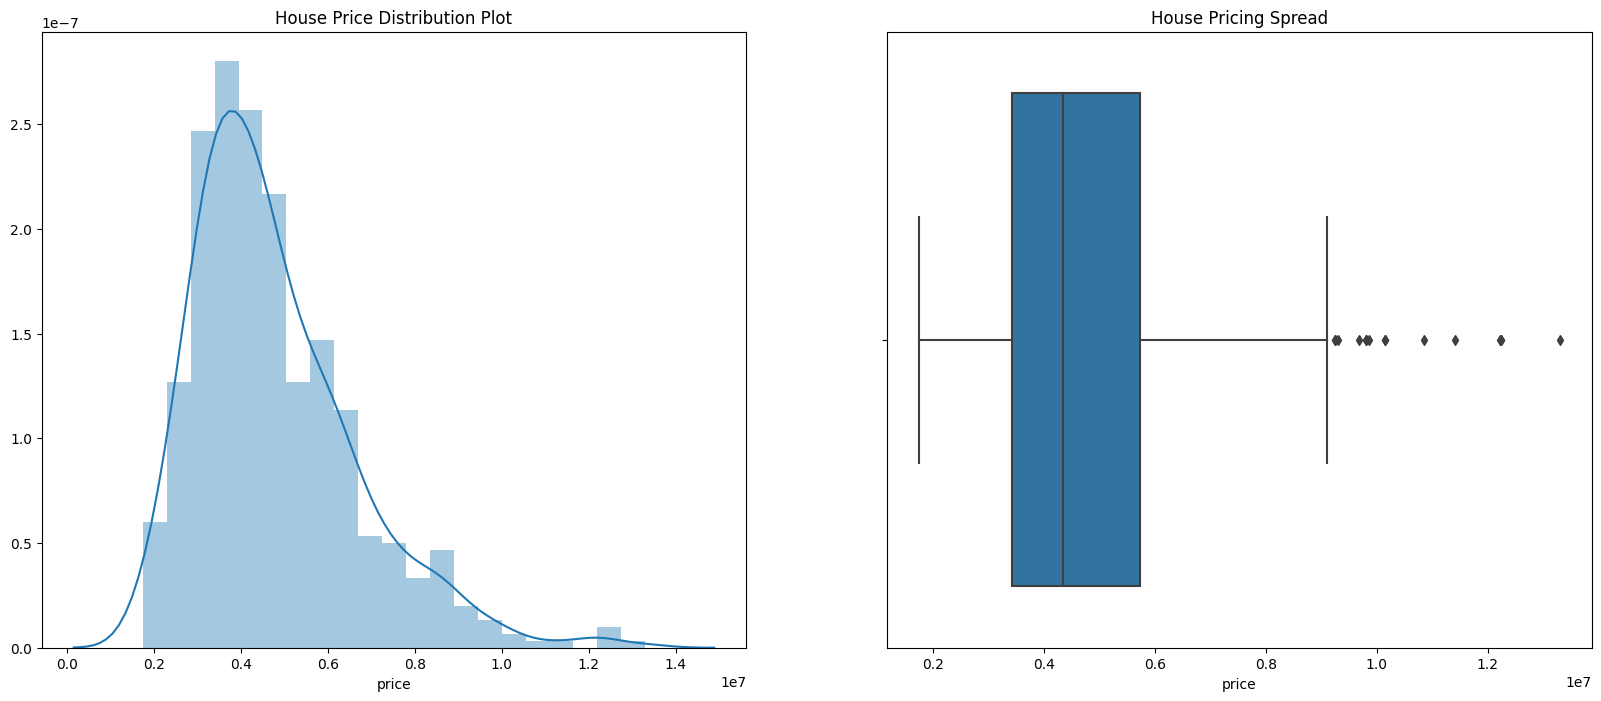

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

From the above plot it is clear that price or target value has outliers. Let plot pair wise plot between features and traget. But just before that lets plot univariate plots for all the numerical features

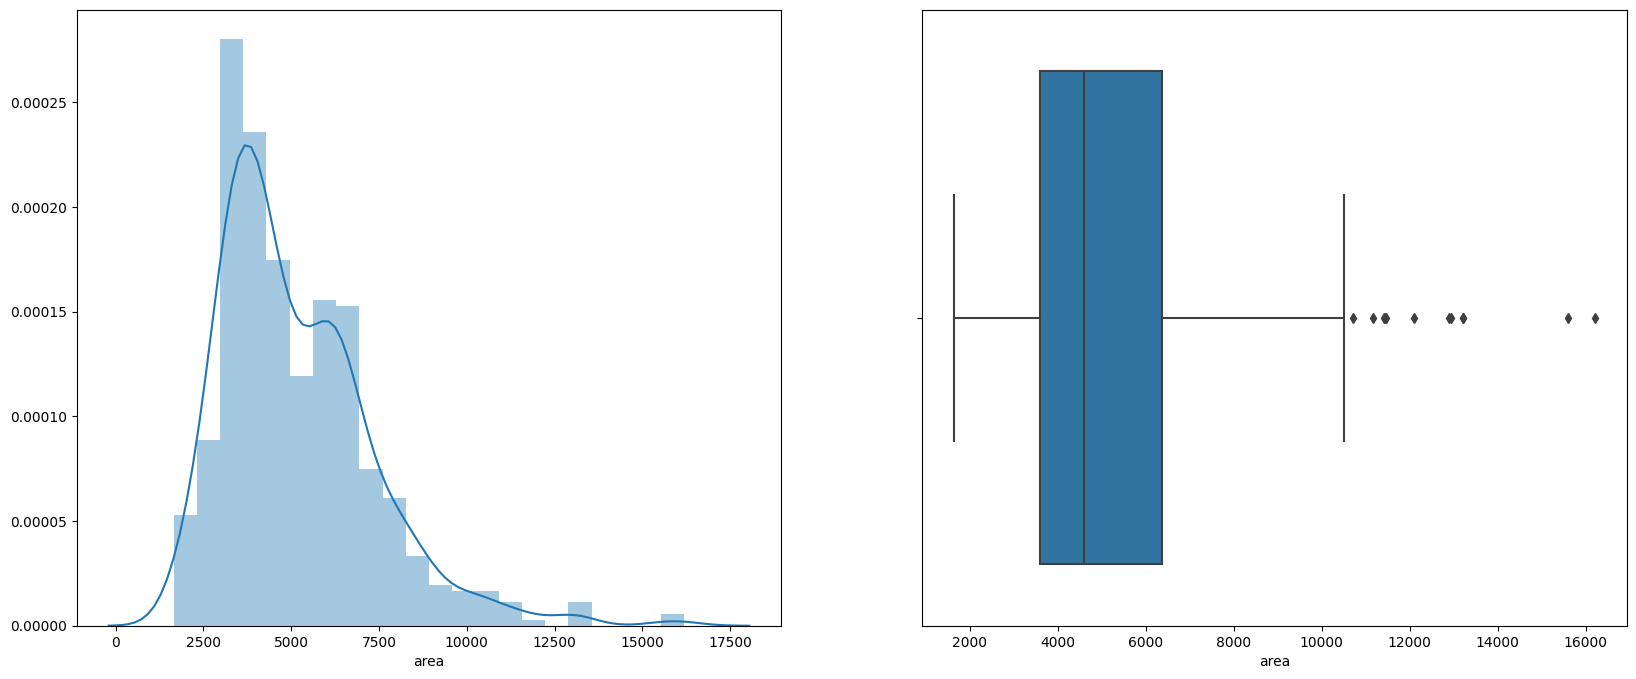

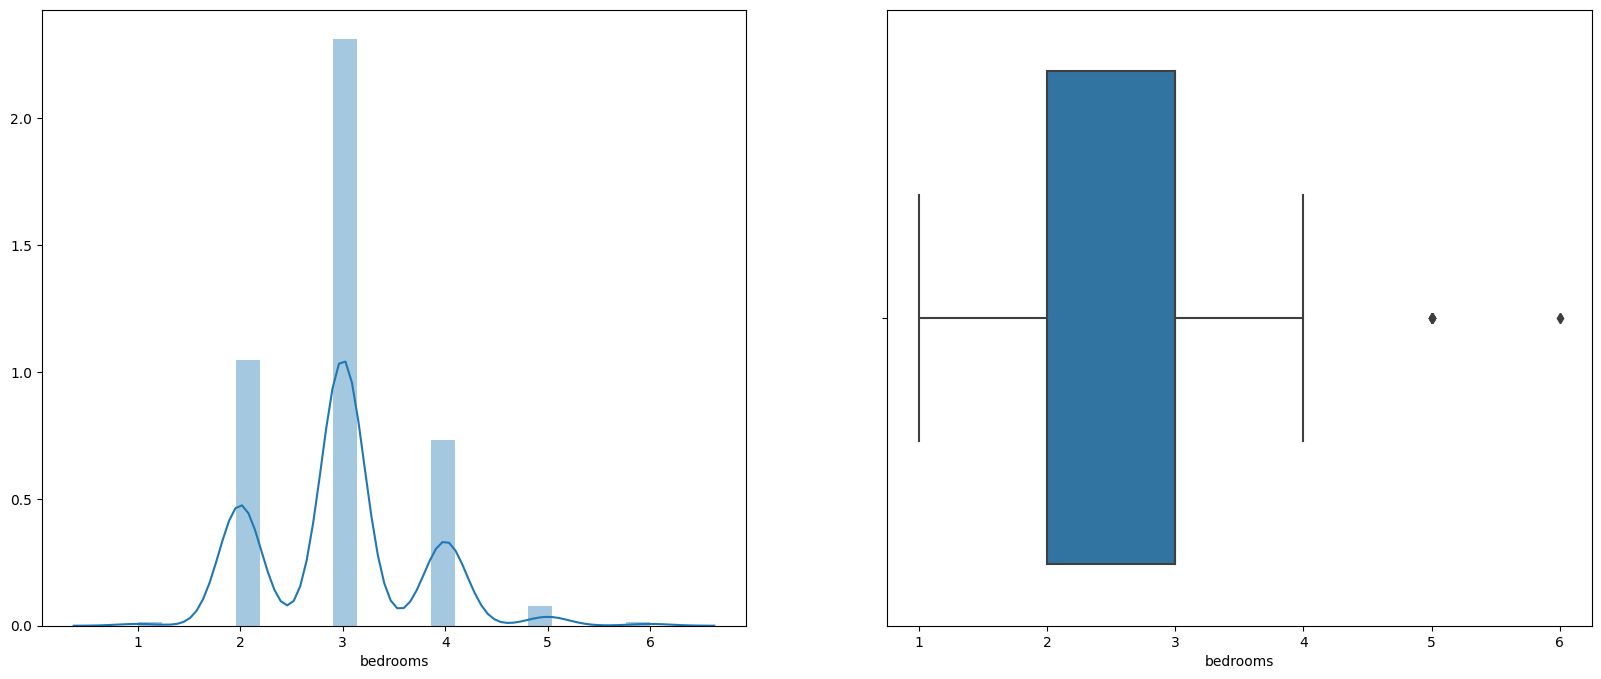

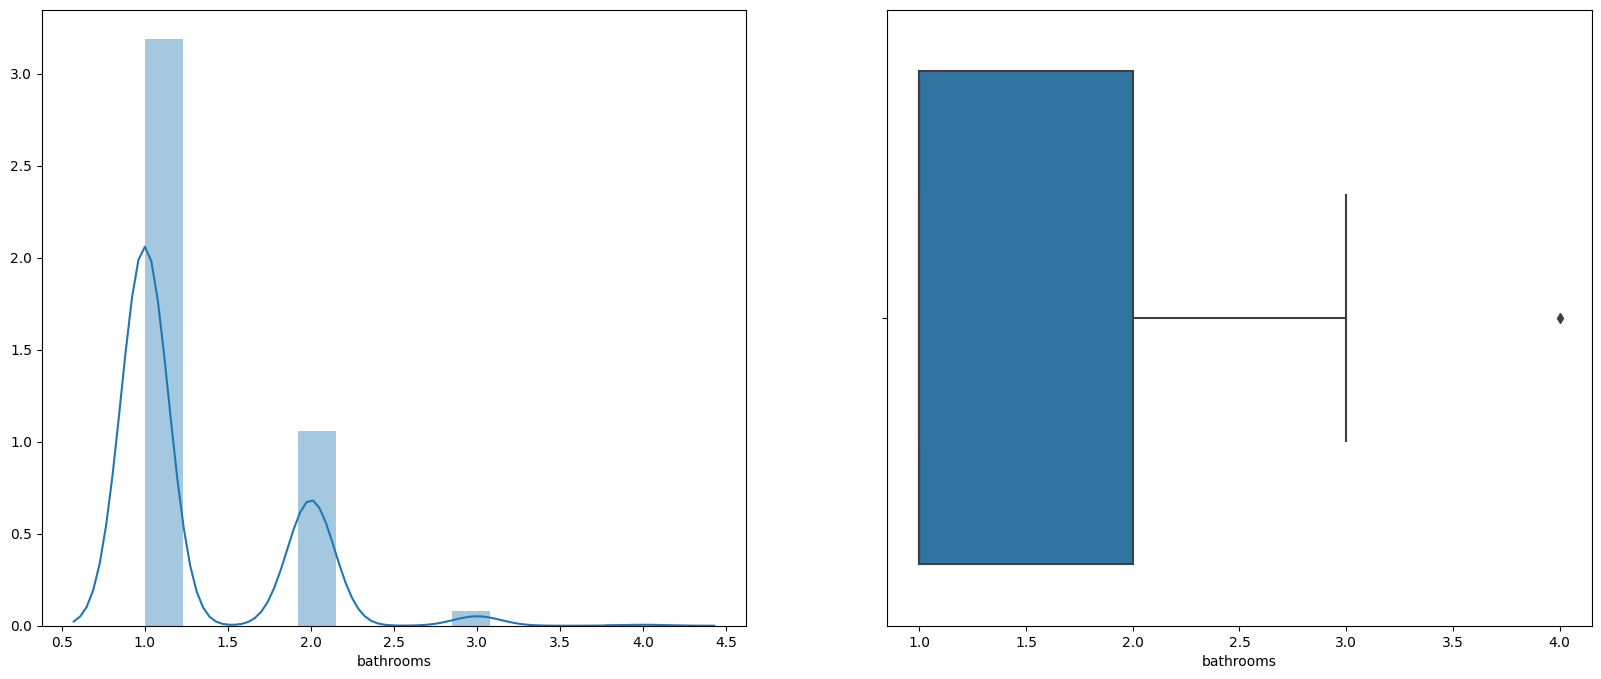

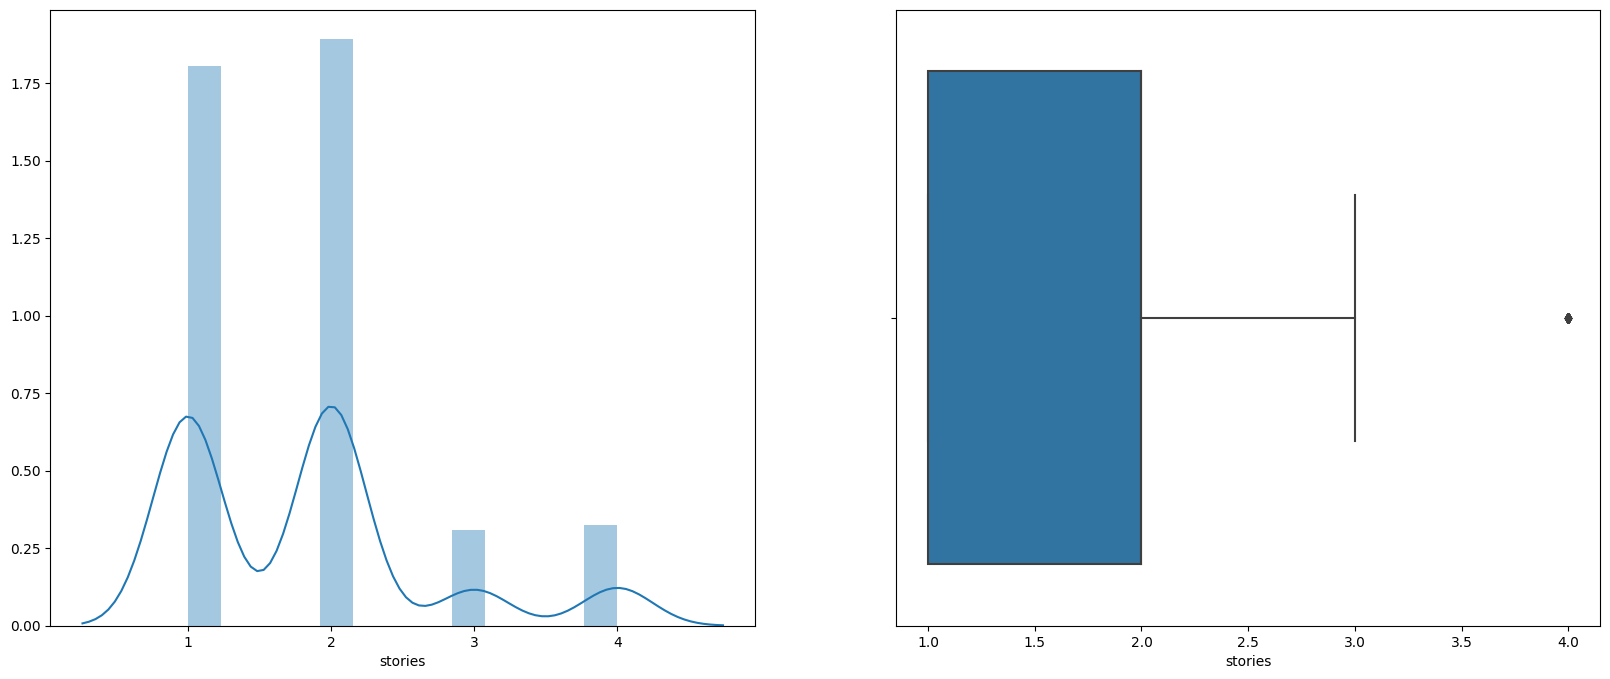

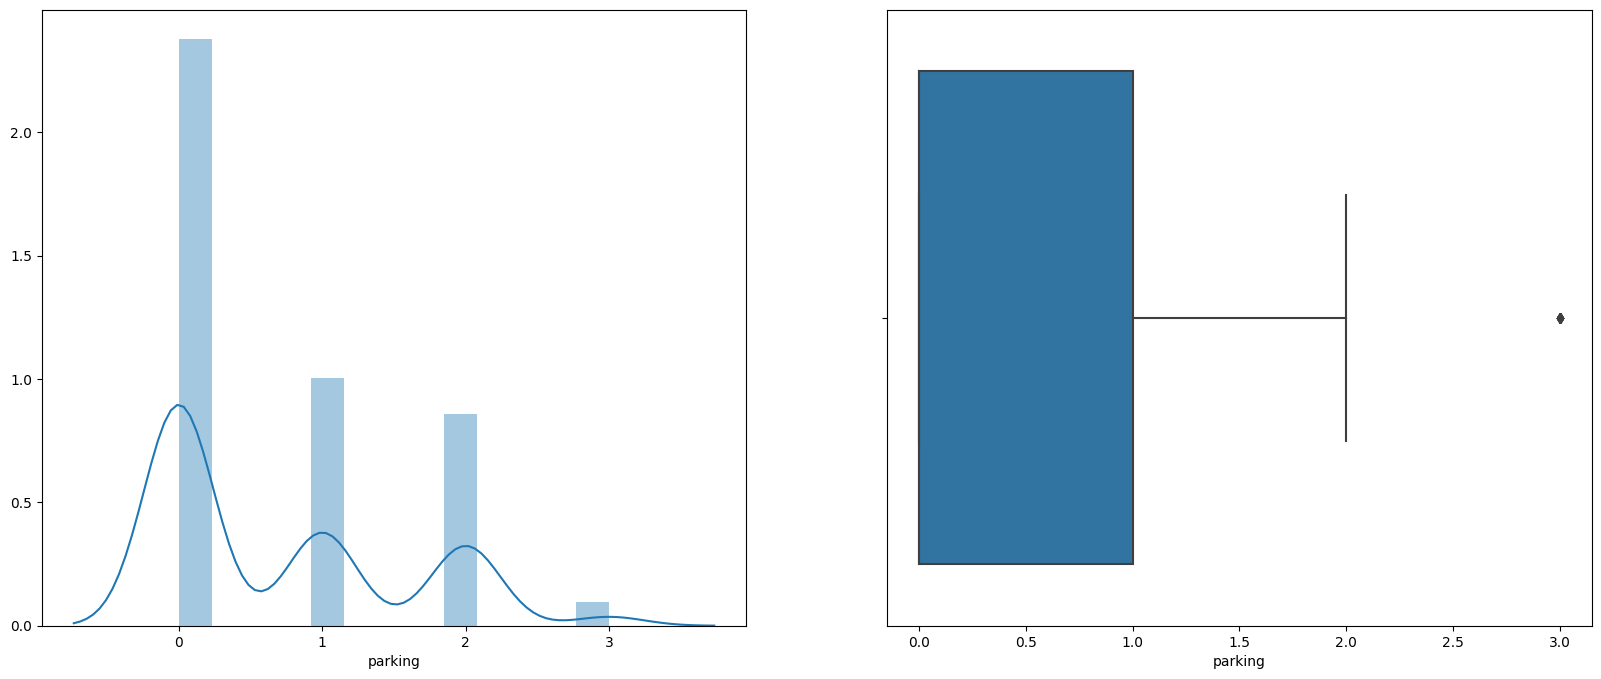

In [38]:
# list of numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']


for feature in numerical_features:
    if 'price' not in feature:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        sns.distplot(df[feature])
        plt.subplot(1,2,2)
        sns.boxplot(df[feature])
        plt.show()
        

<Figure size 1000x800 with 0 Axes>

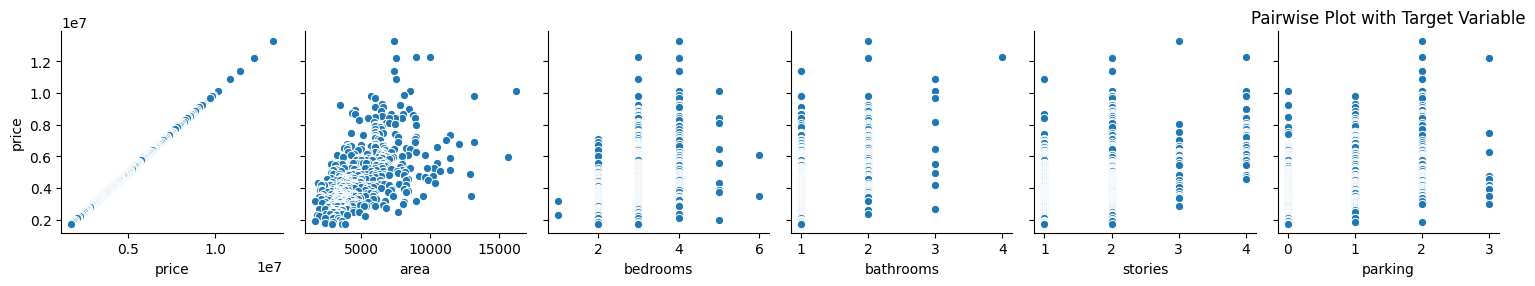

In [39]:
# pair wise plot with target variable
plt.figure(figsize=(10, 8))
sns.pairplot(df, x_vars=numerical_features, y_vars=['price'])
plt.title('Pairwise Plot with Target Variable')
plt.show()

From the above area and bedrooms clearly show upword trends.

In [40]:
# categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

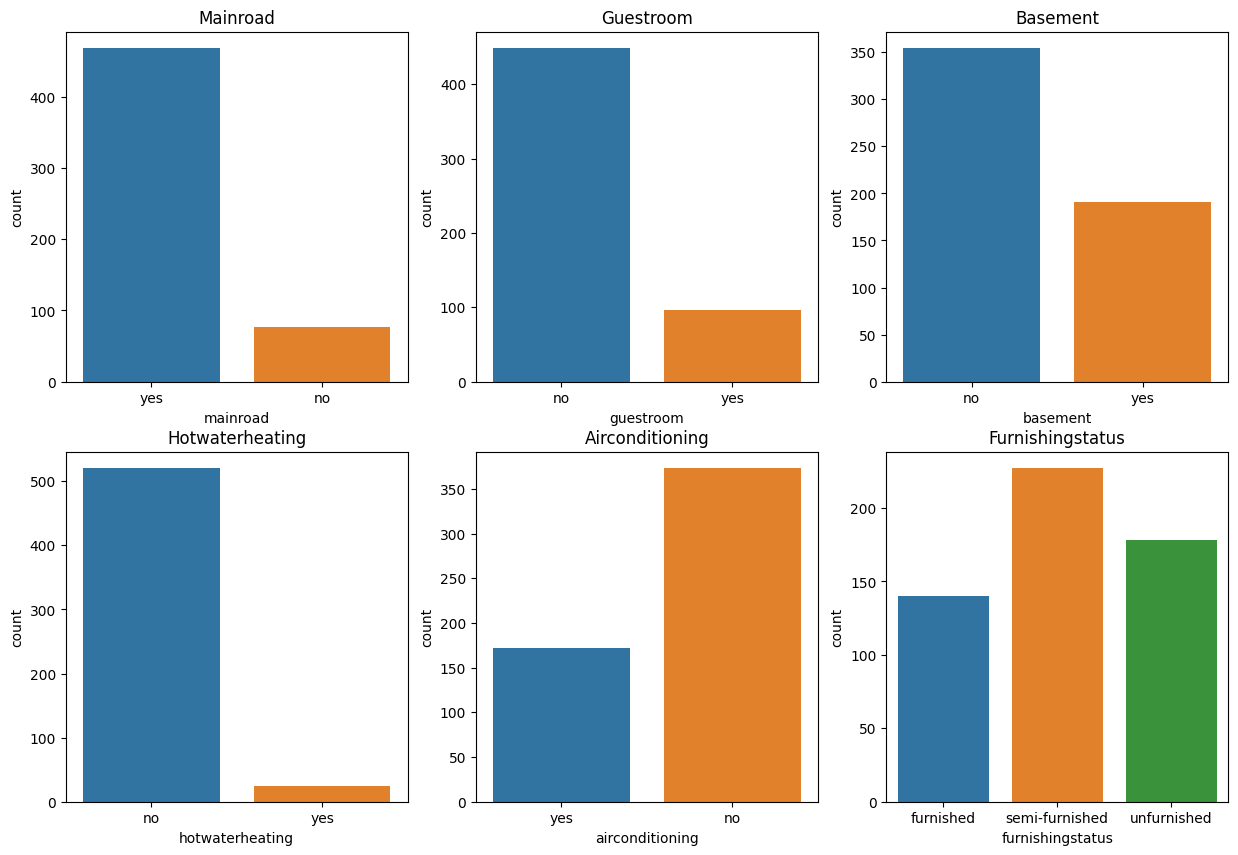

In [44]:
# plot the distribution of categorical features
plt.figure(figsize=(15, 10)) 
plt.subplot(2, 3, 1)
sns.countplot(df['mainroad'])
plt.title('Mainroad')

plt.subplot(2, 3, 2)
sns.countplot(df['guestroom'])
plt.title('Guestroom')

plt.subplot(2, 3, 3)
sns.countplot(df['basement'])
plt.title('Basement')

plt.subplot(2, 3, 4)
sns.countplot(df['hotwaterheating'])
plt.title('Hotwaterheating')

plt.subplot(2, 3, 5)
sns.countplot(df['airconditioning'])
plt.title('Airconditioning')

plt.subplot(2, 3, 6)
sns.countplot(df['furnishingstatus'])
plt.title('Furnishingstatus')

plt.show()

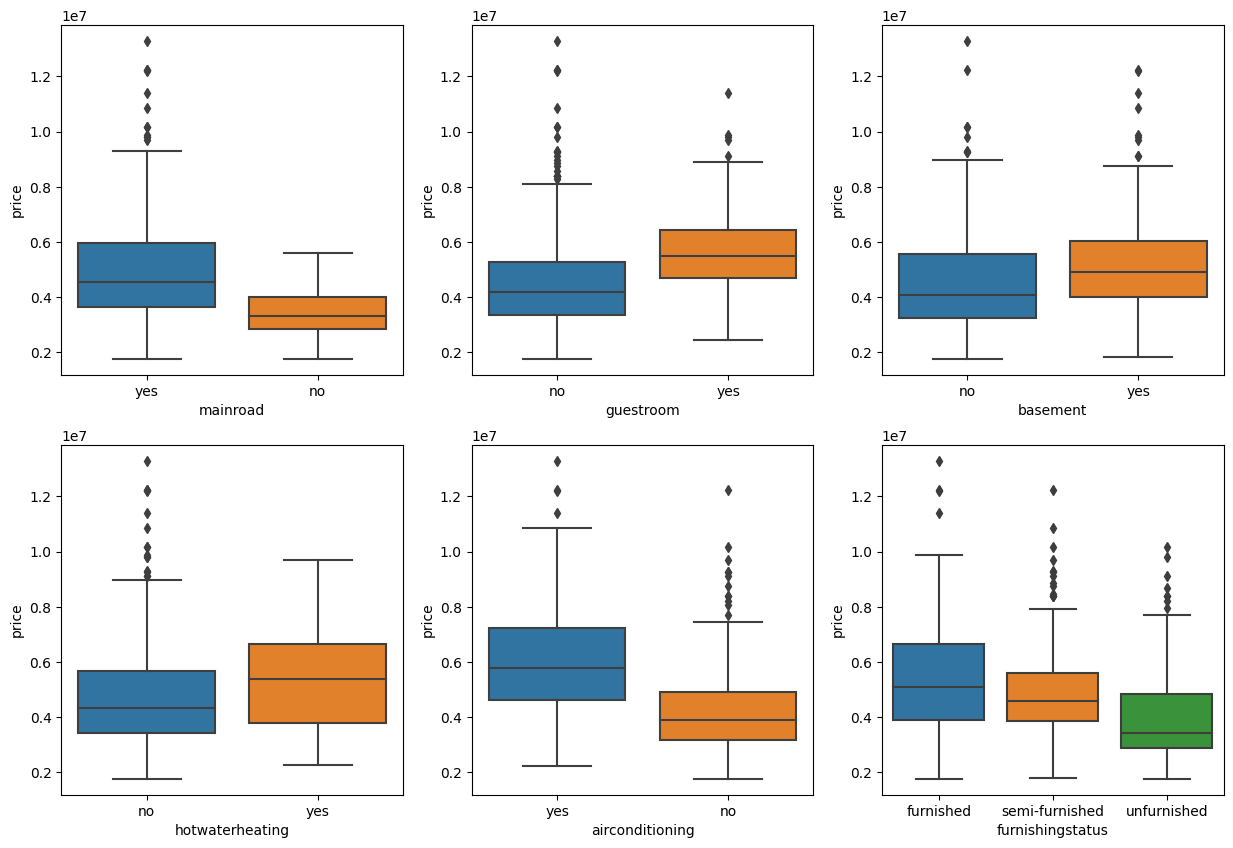

In [45]:
# boxplot of categorical features vs price
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(x='mainroad', y='price', data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x='guestroom', y='price', data=df)

plt.subplot(2, 3, 3)
sns.boxplot(x='basement', y='price', data=df)

plt.subplot(2, 3, 4)
sns.boxplot(x='hotwaterheating', y='price', data=df)

plt.subplot(2, 3, 5)
sns.boxplot(x='airconditioning', y='price', data=df)

plt.subplot(2, 3, 6)
sns.boxplot(x='furnishingstatus', y='price', data=df)

plt.show()


From the above following points can be gathered or inferenced:
1. Houses having a main road connectivity or near to main road have high correlation to price.
2. Houses with guestroom have strong correlation to price.
3. Houses with basement slighlty contribute to price.
4. Houses with hot watering faclitlity slightly contribute to price.
5. Houses with airconditioning have high correlation with price.
6. Furnished status is adding to price. 